<center>
<h1>CSCI3151 - Foundations of Machine Learning - Fall 2024</h1>
<h2>Assignment 3</h2>
</center>


**Due on: 11 October at 23:59 ADT**

- **Grade Period**: There is a 5-hour grace period after the deadline to allow for last minute technical issues.
- **Late Submissions:** You can submit the assignment up to 2 days late with a 20% penalty applied to your grade.
- **AI tools:** The policy on using AI tools is as discussed in class, and will be announced on Brightspace.
- **Working in Groups:** You may do this assignment alone or in groups of 2 or 3. If working in groups, only one person must submit it, and the assignment must clearly indicate the names and B-numbers of all group members.

[Assignment Submission Instructions as given on BrightSpace](https://dal.brightspace.com/d2l/le/content/342520/viewContent/4477501/View)

# Preamble

In this assignment you will explore regression and gradient descent, two of the most fundamental building blocks in machine learning and data science. You will also continue exploring creating synthetic data sets (as you already did for A1), one of the most valuable skills in machine learning: creating your own synthetic data set is the best ML debugging tool I know of!

The first step will be to create your dataset (Question 1). Then you will build a regression solver (Question 2). And finally, you will improve your model to make it more powerful (Question 3). For top marks you will also add a regularization term, so that your powerful model isn’t *too* powerful :)

The focus of this assignment is two fold. First, it is to help you get comfortable building a linear regression model and understand gradient descent. Second, is to help you get used to experimenting with your models and debugging them.

Feel free to create new cells or new functions if you want to experiment with something. In fact, you are encouraged to do this. You should play around and see all the things this model can do.

Functions that have a little `# GRADED FUNCTION` or cells that start with `# GRADED SECTION` are the graded parts (coding parts) of this Jupyter Notebook.

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

## **1. Data Generation** ( 6 pts)

You will create a set of functions that generate data which can be used to train a regression model. The regression will ultimately take one input, $x$, and produce one (target) output, $t$. However, your data generation function will also take some parameters, as described later.

### a) Linear Data
First, write a function `generate_line(n=100, xmin=0, xmax=10, c0=0, c1=0)`
that randomly chooses $n$ input points in the interval $[x_{min}, x_{max}]$. For each $x$ in this list it computes a target $t = c_0 + c_1 x$. It returns a list (or `numpy.ndarray`) $[[x_0, t_0], [x_1,t_1], \dots, [x_n,t_n]]$. For example:
```python
data = generate_line(3, 0, 5, 1, 2)
data
>    [[2.39126432027044, 5.78252864054088],
      [3.750966822926141, 8.501933645852283],
      [1.9454086762362344, 4.890817352472469]]
```

In [3]:
# This function is here to help you plot your line.
def plot_curve(data):
    plt.scatter(data[:, 0], data[:, 1], marker='o', color='blue')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.grid(True)
    plt.show()

#### Answer 1a.

In [4]:
# GRADED FUNCTION
def generate_line(n=100, xmin=0, xmax=10, c0=0, c1=0):
    # your code here

    x = np.random.randint(xmin, xmax, n)
    t = c0 + c1 * x

    return np.column_stack((x,t))

    

   
    pass

#### Manual Test 1a.

[[1 1]
 [4 4]
 [2 2]
 [8 8]
 [4 4]
 [6 6]
 [2 2]
 [6 6]
 [5 5]
 [9 9]]


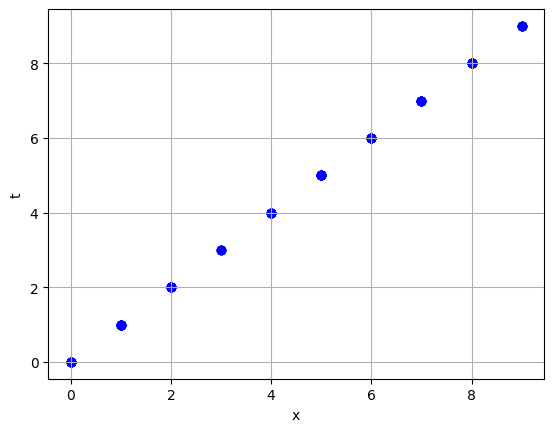

In [5]:
# Test your function by plotting a line
# and printing the first 10 points in your array.

data = generate_line(100, 0, 10, 0, 1)
print(data[:10])
plot_curve(data)

### b) Polynomial Data
Now modify the above function, to create a new function:

 `generate_poly(n=100, xmin=0, xmax=10, coeffs=[1, 2])`

This is the same as `generate_line`, except that instead of two parameters $c_0$ ane $c_1$, you can provide as an argument a vector $[c_0, c_1, \dots, c_D]$ of arbitrary length $D+1$, where the $c_i$'s  represent the coefficients of a polynomial.

 So for example, if you write:
 `generate_poly(coeffs=[1, 5, 2, -4])`
then this would generate points along the polynomial $t = 1 + 5x + 2x^2 - 4 x^3$.

That is, $\text{coeffs}=[c_0, c_1, \dots, c_D]$ will make your function generate data from the polynomial $t = c_0 + c_1 x + c_2 x^2 + … + c_D x^D$. This function should also return a list (or `numpy.ndarray`) $[[x_0, t_0], [x_1,t_1], \dots, [x_n,t_n]]$.

> NOTE: `numpy.vander` function does exactly this but you're not allowed to use it for this particular question. We want you to understand how to build this on your own.

#### Answer 1b.

In [6]:
# GRADED FUNCTION
def generate_poly(n=100, xmin=0, xmax=10, coeffs=[1, 2]):
    # your code here
    # np.vander is not allowed

    x = np.random.randint(xmin, xmax, n)
    res = np.empty((n, 2))

    for i in range(n):

        t = coeffs[0]

        for j in range(1, len(coeffs)):
            t += coeffs[j] * pow(x[i],j)
        
        res[i] = [x[i], t]       
    
    return res

    pass

#### Manual Test 1b.

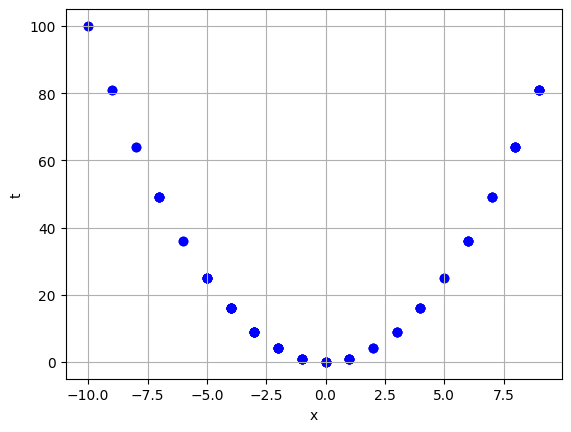

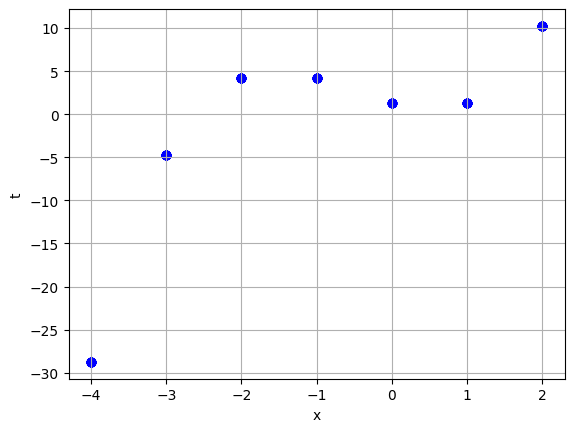

In [7]:
num_pts = 100
x_min, x_max = (-4, 3)
coefficients = [5/4, -5/2, 3/2, 1]

# Test against a known curve: x^2
data = generate_poly(100, -10, 10, coeffs=[0,0,1])
plot_curve(data)

# Test given curve
data = generate_poly(num_pts, x_min, x_max, coefficients)
plot_curve(data)

### c) Noisy Polynomial Data.
Finally, rewrite your `generate_poly()` function to use the function `noise(mean, standard_deviation)` below to add random gaussian noise to every generated data point, so that the targets $t$ are
$t = \Sigma_i (c_i x^i) + \text{noise}(\theta, \sigma)$. This should make your line look noisy and not perfect.

In [8]:
def noise(mean, standard_deviation):
    return random.gauss(mean, standard_deviation)

In [20]:
# GRADED FUNCTION
def generate_poly_noisy(n=100, xmin=0, xmax=10, coeffs=[1], theta=0.5, sigma=0.5):
    # your code here

    x = np.random.randint(xmin, xmax, n)
    res = np.empty((n, 2))

    for i in range(n):

        t = coeffs[0]

        for j in range(1, len(coeffs)):
            t += coeffs[j] * pow(x[i],j)

        t += noise(theta, sigma)
        
        res[i] = [x[i], t]       
    
    return res

    pass


#### Manual Test 1c.

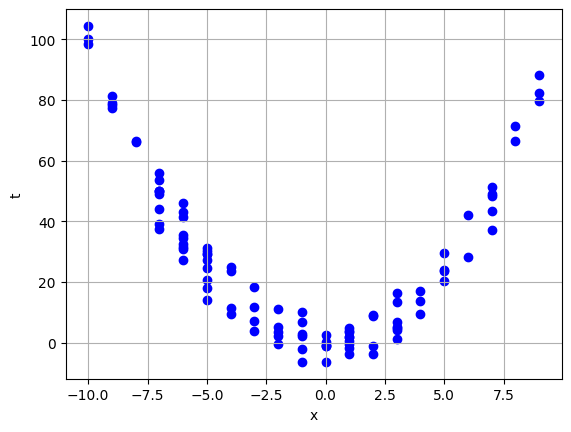

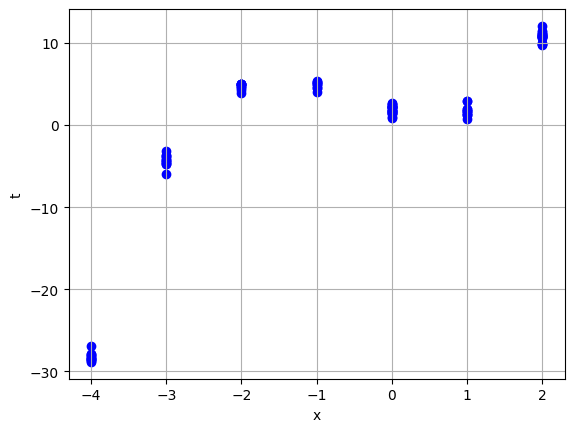

In [19]:
# Test against a known curve: x^2
data = generate_poly_noisy(100, -10, 10, coeffs=[0,0,1], theta=0, sigma=5)
plot_curve(data)

# Test given curve (from previous section)
data = generate_poly_noisy(num_pts, x_min, x_max, coefficients)
plot_curve(data)

## **2. Gradient Descent** ( 8 pts)
In this question we will learn first hand how gradient descent works, in the context of a synthetic dataset and a simple model:

You will write functions that implement gradient descent to fit a linear regression model to data. To test your model and your optimizer, you will use data generated by your function from Question 1.

Note that to keep the assignment short, you are not required to use a validation or test set. Normally this would be an essential part of the process. However, this exercise focuses on the inner workings of gradient descent applied to the quadratic cost function as (was / will be) learned in class.

Your model will have the form

$y = w_0 + w_1 x$,

where $w_0$ and $w_1$ are the parameters of your model, $x$ is the input, and $y$ is your model's prediction.


> Note: It's important that the
code you write is well documented and that no other external package is used (pandas, numpy
are ok).

### a) Linear Regression

Given the values of $x$, we want to fit a linear regression model to predict the $y$ values. We will implement a vectorized version of the gradient descent algorithm. Input ($\mathbf{X}$) and target ($t$) are provided as arguments. $\mathbf{X}$ is modified ($\mathbf{X}_b$) to account for the bias. The coefficients ($\theta$) have been initialized for you. Use Mean Squared Error as the loss function. The shape of the variables $\mathbf{X}$, $t$, and **b** have been given, use this as a guide to output the appropriate shape.

Fill in the gradient descent iteration loop and return the updated `cost_list` and parameters. Please be sure your code is well commented!

> Hint: Some tips for choosing values for the learning rate `lr` and the number of steps to run for `iterations`: this depends greatly on the complexity of your dataset and the sophistication of your model. In this instance the learning rate can be small, on the order of ~0.001. As for the number of iterations, try running the algorithm for 1000 steps. If it seems the model has stopped learning after fewer, say, 500, reduce the number of iterations and run it again!

In [26]:
# GRADED FUNCTION
def calculate_gradients(X, t, y):
    N = X.shape[0]
    gradients = (1 / N) * X.T.dot(y - t)
    return gradients

# GRADED FUNCTION
def prediction_cost(t, y):
    N = t.shape[0]
    cost = (1/2*N) * np.sum(pow(y-t,2))
    return cost

# GRADED FUNCTION
def LR(X, t, lr, iterations):
    # Ensure X is a 2D array. If X is 1D (e.g., shape (N,)), reshape it to (N, 1)
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    # Adding 1 column in X for bias
    b = np.ones((len(X), 1))             # shape : (N, 1)
    X_b = np.append(X, b, axis=1)        # shape : (N, features + 1)
    theta = np.zeros((X_b.shape[1], 1))  # shape : (features + 1, 1)
    t = t.reshape(-1, 1)                 # shape : (N, 1)
    cost_list = []

    for _ in range(iterations):
        # calculate current predictions
        y = X_b.dot(theta)

        # get the cost of the prediction
        cost = prediction_cost(y, t)

        # calculate the partial derivatives
        gradients = calculate_gradients(X_b, t, y)

        # update the weights
        theta = theta - (lr * gradients)

        # append the value to the cost list
        cost_list.append(cost)

    return cost_list, y, theta

We've included a function below to help you visualize your model's predictions. Pass in your dataset with input $\mathbf{X}$ and target $t$, and your model's predictions $y$ and cost list `cost_list` as returned from `LR()` to see them graphed.

In [32]:
def graph_lr(X, t, y, cost_list):
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    plt.title('Model Predictions vs Actual Targets')
    plt.scatter(X, t, c='g', s=10, label="targets")
    plt.scatter(X, y, c='b', s=10, label="predictions")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.title('Model Cost')
    plt.plot(range(len(cost_list)), cost_list, c='b')
    plt.show()

Play around with different curves, noise leves, iterations, learning rate, etc. See how each one affects the way the model learns.

Show a graph of your LR function working using the `graph_lr` function.
Then report your findings on:

- iterations vs cost
- learning rate vs cost

use graphs to show your results.

I've provided you with some starter code but feel free to change everything in the cell below. The two key things we want to see are: how does your model do against a straight line and the results of your experiments with learning rate and number of iterations.


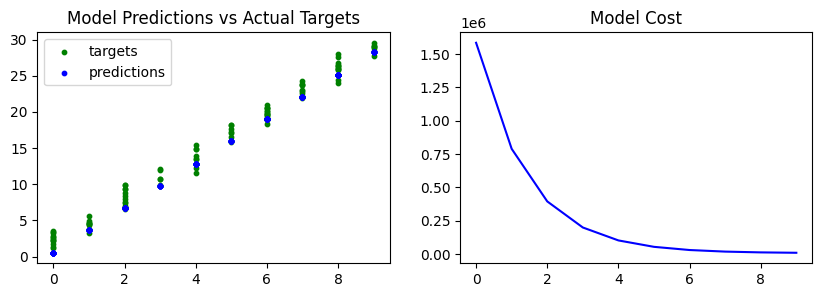

In [72]:
# GRADED SECTION

data = generate_poly_noisy(n=100, xmin=0, xmax=10,coeffs=[2, 3], theta=0, sigma=1)

X = data[:, 0]
X = X.reshape(-1, 1)
t = data[:, 1]
lr = 0.01
iterations = 10

cost_list, y, theta = LR(X, t, lr, iterations)

graph_lr(X, t, y, cost_list)

# your code here
# feel free to modify the above code too

### b) Closed Form Solution
Compare this model with a solution computed in closed form. Input ($\mathbf{X}$) and target ($t$) are provided as arguments. $\mathbf{X}$ is modified ($\mathbf{X}_b$) to account for the bias. The function should return the optimum parameter $\theta$.


In [42]:
from numpy.linalg import inv

def linear_direct(X, t):
  theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, t))

  return theta

In [43]:
# Parameters found by direct method (closed form)
linear_direct(X, t).astype(int)

array([3])

In [44]:
# Parameters found by gradient descent
theta.astype(int)

array([[3],
       [0]])

### c) Discussion

Discuss how the choice of learning rate and number of iterations in part a) affects the fitting of the model.


#### Answer c

### Iterations

Trying out different iteration numbers, (1, 10, 100, 1000, 10000). It seems like increasing the number of iterations leads to a more linear (almost L shape) on the model cost graph.

### Learning Rate

Ideally (an appropriate learning rate) should plot a graph where the cost consistently decreases. Trying out different learning rates, (0.0001, 0.001, 0.01, 0.1). 

- 0.1 -> Cost increases, incorrect behaviour 
- 0.01 -> Best learning rate, cost consistently decreases smoothly 
- 0.001 -> Decent learning rate, functionality works however its very slow.




### d) Stochastic Gradient Descent

Write a version of gradient descent that does stochastic gradient descent with mini-batches as described in class/tutorial. The function will take the same parameters as before, but also an additional parameter `m` that specifies the mini-batch size.

Provide error plots and experiment with different values of mini-batch size `m` and step-size (learning rate `lr`). Show how you can call it so that it works reasonably well, and discuss your observations briefly. Are you able to call it in a way so that it does not work?

In [ ]:
# GRADED FUNCTION
def stochastic_gradient_descent(X, t, lr, iterations, m):
  b = np.ones((len(X), 1))             # shape : (N, 1)
  X_b = np.append(X, b, axis=1)        # shape : (N, features + 1)
  t = t.reshape(-1, 1)                 # shape : (N, 1)
  theta = np.zeros((X_b.shape[1], 1))  # shape : (features + 1 ,1)
  cost_list = []


  for _ in range(iterations):
    # your code here (~ 5-6 lines)

    cost_list.append(cost)

  return cost_list, y, theta


In [ ]:
# section for graphs and experiments

# try to have cells be self-contained - use local variables and regenerate data

#### Observations (answers part d)

Type your answers here.

## **3. Polynomial Features** ( 8 pts)

What happens if you try to fit a linear regression model to cubic data? As you may have observed in the previous question, your model is not powerful enough--all it can really fit well are straight lines! But no need to worry, now you will extend your model by providing it will non-linear features.

### a) Compute the Features

First let's compute the values of these features. Let's assume we know that the relevant features are powers of $x$. For a given $x$, and a given $D$, write a function that takes in $x$ and $D$ and outputs a vector
$[x^0, x^1, x^2, \dots, x^D]$
consisting of the powers of $x$, from $0$ to $D$. So for example, `compute_features(x = 5, D = 3)` will return `[1, 5, 25, 125]`.

> Note: You can use `np.vander` here if you'd like. Make sure you read the documentation for this function before using it - it doesn't give you exactly what you'd expect.


In [ ]:
# GRADED FUNCTION
def compute_features(x, D):
    # your code here
    pass

# quick check to ensure function works as expected
compute_features(5, 3), compute_features(2, 11)

### b) Define the Model

Your new model will have the following form: $y = w_0 + w_1 x + \dots w_D x^D$.

This section is just a little practice before writing the actual polynomial gradient descent so that you understand that you're doing.


In [ ]:
# GRADED SECTION

data = generate_poly_noisy(n=3, xmin=0, xmax=10, coeffs=[0, 10], theta=0, sigma=1)

X = data[:, 0]
t = data[:, 1]
N = X.shape[0]

dims = 3
lr = 0.01

# use the function you just wrote
X_d = ???

# initialize the weights to 0
theta = ???

# compute the predictions
y = ???

# compute the gradients for a single step
gradients = ???

# update your weights
updated_theta = ???

# calculate a new prediction
new_y = ???

print(f"{X=}\n")
print(f"{X_d=}\n")
print(f"{theta=}\n")
print(f"{gradients=}\n")
print(f"{updated_theta=}\n")
print(f"{new_y=}\n")

### c) Implement Gradient Descent

Implement gradient descent and plot your predictions

In [ ]:
# GRADED FUNCTION
def poly_gradient_descent(X, t, lr, iterations, dims):
  X_d = np.vander(X, dims, increasing=True)
  t = t.reshape(-1, 1)
  theta = np.zeros((X_d.shape[1], 1))
  cost_list = []

  for i in range(iterations):

    # your code here (~ 4-5 lines)

    cost_list.append(cost)


  return cost_list, y, theta

#### Automated Tests 3c

These should test your algorithm against some fixed curves so that you can see how well your algorithm does. We **HIGHLY** recommend playing around with your function yourself so that you can see how it behaves. These tests are just a **starting point**.

In [ ]:
def test_against_line():
  '''
  This function tests the created poly_gradient_descent
  against a simple line. We calculate up to 3 dimensions 1, x, x^2
  of weights.
  '''
  data = generate_poly_noisy(n=100, xmin=0, xmax=1,
                            coeffs=[0, 10], theta=0, sigma=0.1)
  X = data[:, 0]
  t = data[:, 1]
  lr = 0.1
  dims = 6
  iterations = 2000
  cost_list, y, theta = poly_gradient_descent(X, t, lr, iterations, dims)

  graph_lr(X, t, y, cost_list)

def test_against_quad():
  '''
  This function tests the created poly_gradient_descent
  against a quadratic polynomial. We calcualte up to 3 dimensions 1, x, x^2
  of weights.
  '''
  data = generate_poly_noisy(n=100, xmin=-1, xmax=1,
                            coeffs=[2, 3, 10], theta=0, sigma=0.1)
  X = data[:, 0]
  t = data[:, 1]
  lr = 0.01
  dims = 3
  iterations = 2000
  cost_list, y, theta = poly_gradient_descent(X, t, lr, iterations, dims)

  graph_lr(X, t, y, cost_list)

def test_against_deg4():
  '''
  This function tests the created poly_gradient_descent
  against a quadratic polynomial. We calcualte up to 5 dimensions
  of weights.
  '''
  data = generate_poly_noisy(n=100, xmin=-1, xmax=1,
                            coeffs=[0, 0.1, 0.1, 0.1, 0.1], theta=0, sigma=0.01)
  X = data[:, 0]
  t = data[:, 1]
  lr = 0.01
  dims = 5
  iterations = 2000
  cost_list, y, theta = poly_gradient_descent(X, t, lr, iterations, dims)

  graph_lr(X, t, y, cost_list)

def test_against_poly():
  '''
  This function tests the created poly_gradient_descent
  against the given polynomial from a previous question.
  '''
  data = generate_poly_noisy(100, -10, 10, [5/16, -5/8, 3/8, 1/4], 0, 0.1)
  X = data[:, 0]
  t = data[:, 1]
  lr = 0.0000001
  dims = 5
  iterations = 1000
  cost_list, y, theta = poly_gradient_descent(X, t, lr, iterations, dims)

  graph_lr(X, t, y, cost_list)

test_against_line()
test_against_quad()
test_against_deg4()
test_against_poly()


### d) Regularization & SGD (**)

Here you need to do two things:
1. Add a regularization term  to the loss function, $\text{Loss_reg} = sum (w_i)^2$ the sum of the squares of the weights. That is, the model will be penalized for large weights.
2. Compute the derivative of the loss with respect to this term, and add it to the gradient computation. This should make the gradients cause the weights to gradually decrease, unless they are actively useful for the model.

Use stochastic gradient descent. This means that instead of computing the gradient on the entire dataset, you will now just work with a few examples at a time. Your gradient descent function can now also take a `batch_size`, so that it randomly selects that size of subset from the full example set.


#### What is the derivative of the regularization term?


Compute the derivative of the regularization term here.

### Coding Answer

In [ ]:
# GRADED FUNCTION
def stochastic_gradient_descent_with_regularization(X, t, lr, iterations, rt, dims, m):
    # your code here

    return cost_list, y, theta

#### Manual Testing

Plot a few graphs and test your function on different lines and at different noise levels. See how the regularization is affecting your model as it goes through the iterations. Compare your model with regulariation against the one without. Remember that you also have `stochastic_gradient_descent` from your previous answers.

In [ ]:
# your code here

## **4. Validation and Testing** ( 8 pts)

(a) Revise your answers for Questions 2 and 3 and add code where needed so that your graphs also show results on a **validation set**.

(b) All your linear regression functions returns the $\theta$ (`theta`) weight values after it learns. Write a function that uses this value to get the predictions for a validation set.


(c) Plot your model working on a linear curve and a non-linear curve for both training and validation sets. You should have a total of at least 4 graphs, each of them should also have the cost as a sub-graph (you can reuse the graph functions from above).

(d) Remember that you should still be training your model on the train set but you can set hyperparameters on the validation set. (Do not train on the validation set!) For example, the validation set can help you decide how strong to make the regularization term, when to stop training, and how many parameters to have in your model. Choose a couple of examples and briefly and clearly explain how you set hyperparameters using your validation set.




In [ ]:
# your code here

## **5. Debugging** ( 2 pts)

( \* \* \* ) What happens to the model predictions when you regularize very strongly -- does it do what you would expect? Can you test this in a few ways? Can you think of a few different datasets that it should be able to fit perfectly? What about a few datasets that it should not be able to fit well? Does it do as expected in each case? This is a hard question because you might need to think very carefully about what to do to test your model thoroughly and how to interpret the results.

You can create cells under this question to argue your answer.